# **Import necessary libraries and load the dataset**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [54]:
df=pd.read_csv('/content/train_transaction.csv')

In [55]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86888,3073888,0,1824332,35.950,W,3094,276.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86889,3073889,0,1824354,84.652,C,6455,545.0,185.0,visa,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86890,3073890,0,1824355,644.950,W,9749,528.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86891,3073891,0,1824377,50.838,C,3154,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,86893.0,3.030446e+06,25083.992807,2987000.000,3008723.0,3030446.0,3052169.00,3073892.00
isFraud,86893.0,2.636576e-02,0.160221,0.000,0.0,0.0,0.00,1.00
TransactionDT,86893.0,1.015407e+06,518266.607576,86400.000,574669.0,1038970.0,1465518.00,1824393.00
TransactionAmt,86893.0,1.296420e+02,206.242289,0.292,44.0,75.0,129.95,4829.95
card1,86893.0,9.886504e+03,4926.847607,1001.000,6019.0,9689.0,14276.00,18395.00
...,...,...,...,...,...,...,...,...
V335,26063.0,1.672190e+01,121.636775,0.000,0.0,0.0,0.00,3200.00
V336,26063.0,1.119278e+01,97.175705,0.000,0.0,0.0,0.00,3100.00
V337,26063.0,2.854887e+01,281.247040,0.000,0.0,0.0,0.00,8250.00
V338,26063.0,3.248159e+01,290.765695,0.000,0.0,0.0,0.00,8250.00


In [57]:
df.isnull().sum().count()

394

In [58]:
df.dtypes.value_counts()

,count
float64,376
object,14
int64,4


In [59]:
null_counts = df.isnull().sum()
null_counts

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
card2,1187
card3,3
card4,6
card5,444


In [60]:
df.columns[df.nunique() == 2]

Index(['isFraud', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V14', 'V41',
       'V65', 'V88', 'V94', 'V305'],
      dtype='object')

In [61]:
dff= df[['isFraud', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V14', 'V27',
       'V41', 'V65', 'V68', 'V88', 'V94', 'V120', 'V121', 'V122', 'V240',
       'V305']]

In [62]:
dff.replace([np.inf, -np.inf], np.nan, inplace=True)

In [63]:
df.V120.isnull().sum()

0

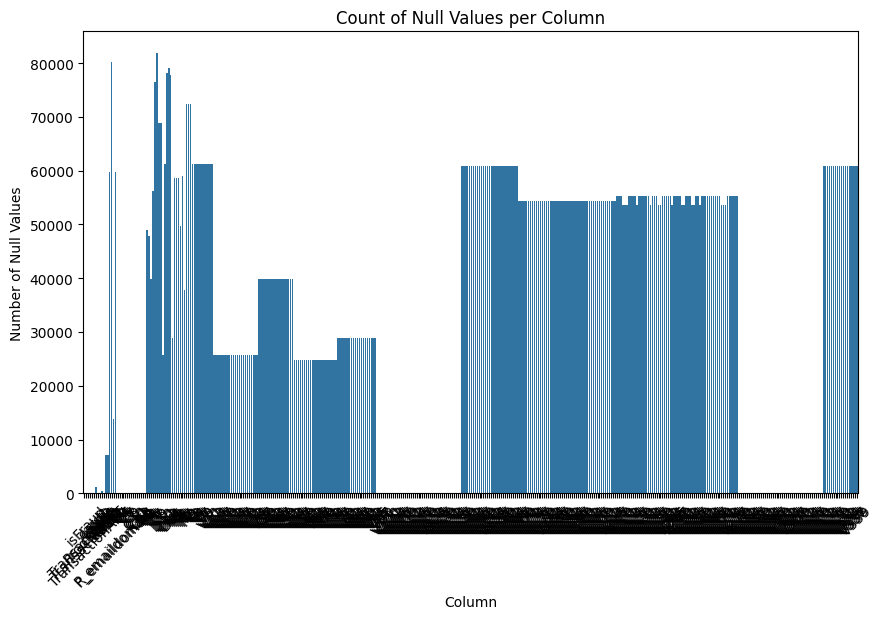

In [64]:

null_counts = df.isnull().sum()

null_counts_df = pd.DataFrame({'Column': null_counts.index, 'Null Values': null_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Null Values', data=null_counts_df)
plt.title('Count of Null Values per Column')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.show()

we notes that we have huge number of null values

In [65]:
c=20000

In [66]:
dropped = df.columns[df.isnull().sum() >= c]

In [67]:
dropped.shape

(279,)

In [68]:
df.drop(dropped, axis=1, inplace=True)

In [69]:
df.shape

(86893, 115)

In [70]:
numerical_df = df.select_dtypes(include=[np.number])

In [71]:
object_df = df.select_dtypes(exclude=[np.number])

In [72]:
numerical_df.shape

(86893, 111)

In [73]:
numerical_df.isnull().sum().count()

111

In [74]:
numerical_df.nunique()

,0
TransactionID,86893
isFraud,2
TransactionDT,83689
TransactionAmt,5957
card1,7169
card2,498
card3,73
card5,86
addr1,263
addr2,40


In [75]:
numerical_df.columns[numerical_df.nunique() < 4]

Index(['isFraud', 'V107', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122',
       'V305'],
      dtype='object')

In [76]:
selected_columns = ['isFraud', 'V107', 'V305']

In [77]:
numerical_df[selected_columns].value_counts()

,,,count
isFraud,V107,V305,
0,1.0,1.0,84590
1,1.0,1.0,2289
0,1.0,2.0,2


In [78]:
numerical_df[selected_columns].fillna(numerical_df[selected_columns].mode().iloc[0], inplace=True)

In [79]:
numerical_df.fillna(numerical_df.mean(), inplace=True)

In [80]:
numerical_df.isnull().sum().sum()

0

In [81]:
object_df.fillna(object_df.mode().iloc[0], inplace=True)

In [82]:
object_df.isnull().sum().sum()

0

In [83]:
get_dummies_df = pd.get_dummies(object_df, drop_first=True)

In [84]:
get_dummies_df.shape

(86893, 68)

In [85]:
get_dummies_df

,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86888,False,False,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
86889,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
86890,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
86891,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
target = df['isFraud']

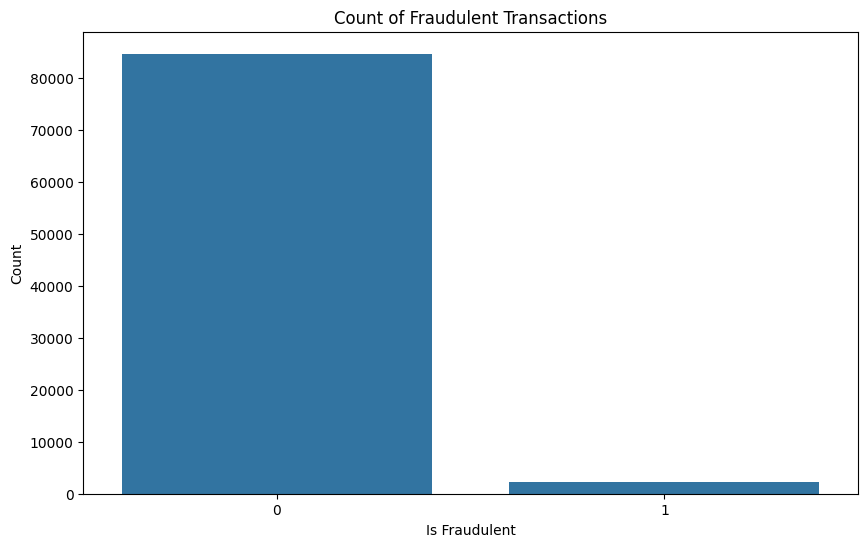

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x=target)
plt.title('Count of Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

In [88]:
df.drop('isFraud', axis=1, inplace=True)

In [89]:
df.drop('TransactionID', axis=1, inplace=True)

In [90]:
#data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
numerical_df.drop('isFraud', axis=1, inplace=True)

In [92]:
scaled_numerical_df = scaler.fit_transform(numerical_df)

In [93]:
concatenated_df = pd.concat([pd.DataFrame(scaled_numerical_df, columns=numerical_df.columns), get_dummies_df], axis=1)


In [94]:
X= concatenated_df
y= target

In [95]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)


In [97]:
print(f"We have {len(X_train)} Training data\nWe have {len(X_test)} Testing data")


We have 65169 Training data
We have 21724 Testing data


# **Modeling**

In [98]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def roc(model, model_name):
    y_pred = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_svm = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
def save(model, model_name):
    joblib.dump(model, model_name)
    print("Model Saved Succesfully")

## **Logistic Regression**

In [99]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 97.34616337654808%
Logistic Regression model score on Training data: 97.43743190780893%
Logistic Regression model score on Testing data: 97.56030197017124%


In [100]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21170
           1       0.68      0.08      0.15       554

    accuracy                           0.98     21724
   macro avg       0.83      0.54      0.57     21724
weighted avg       0.97      0.98      0.97     21724



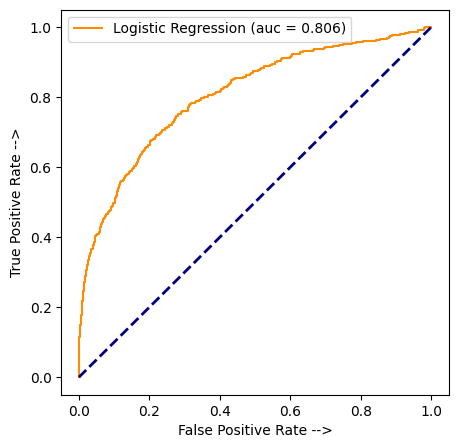

In [101]:
roc(lr_model, "Logistic Regression")

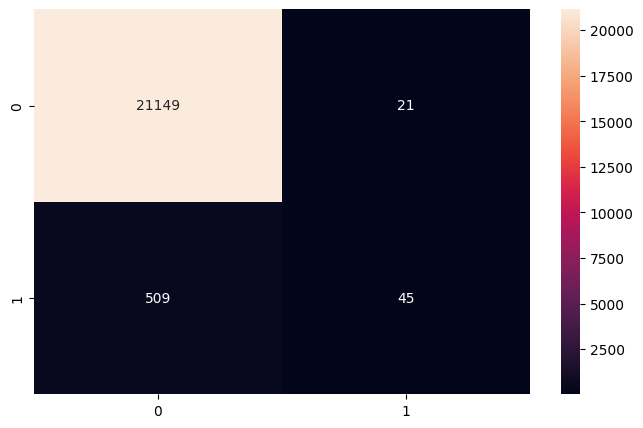

In [102]:
conf_matrix(lr_model)

# **Random Forest**

In [103]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=40)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 97.7029149854299%
Random Forest model score on Training data: 99.99386211235404%
Random Forest model score on Testing data: 98.31062419443933%


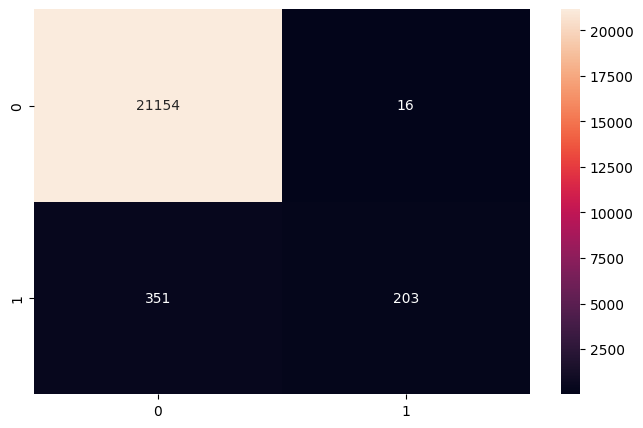

In [104]:
conf_matrix(rf_model)

In [108]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21170
           1       0.68      0.08      0.15       554

    accuracy                           0.98     21724
   macro avg       0.83      0.54      0.57     21724
weighted avg       0.97      0.98      0.97     21724

